In [12]:
#Pytorch로 Logistic Regression 구현
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  cost.backward() #기울기 계산
  with torch.no_grad():
    w = w - lr * w.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print(f"w : {w}, b : {b}, cost : {cost}")

w : tensor([[-0.3273]]), b : tensor([[0.5170]]), cost : 0.6410772800445557
w : tensor([[-1.4745]]), b : tensor([[4.4785]]), cost : 0.41875192523002625
w : tensor([[-1.9115]]), b : tensor([[5.8134]]), cost : 0.3982717990875244
w : tensor([[-2.1831]]), b : tensor([[6.6361]]), cost : 0.3906193673610687
w : tensor([[-2.3737]]), b : tensor([[7.2108]]), cost : 0.3869032561779022
w : tensor([[-2.5155]]), b : tensor([[7.6371]]), cost : 0.38486385345458984
w : tensor([[-2.6246]]), b : tensor([[7.9645]]), cost : 0.3836621046066284
w : tensor([[-2.7104]]), b : tensor([[8.2218]]), cost : 0.382920503616333
w : tensor([[-2.7790]]), b : tensor([[8.4272]]), cost : 0.3824479877948761
w : tensor([[-2.8345]]), b : tensor([[8.5932]]), cost : 0.3821395933628082
w : tensor([[-2.8797]]), b : tensor([[8.7285]]), cost : 0.38193491101264954
w : tensor([[-2.9168]]), b : tensor([[8.8395]]), cost : 0.3817969858646393
w : tensor([[-2.9475]]), b : tensor([[8.9310]]), cost : 0.38170328736305237
w : tensor([[-2.9729]]

In [13]:
#Test : x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
with torch.no_grad():
  x_test = torch.FloatTensor([[4.5], [1.1]])
  h_test = torch.sigmoid(torch.mm(x_test, w) + b)
  
  h_test[h_test > 0.5] = 1
  h_test[h_test <= 0.5] = 0

  print(h_test)

tensor([[0.],
        [1.]])


In [15]:
#여러가지 Optimizer 사용해보기 - SGD
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optim = torch.optim.SGD([w, b], lr = 1.0)

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  optim.zero_grad() #w, b의 기울기 초기화
  cost.backward() #기울기 계산
  optim.step() #w, b 값 갱신

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"w : {w.item()}, b : {b}, cost : {cost}")

w : -0.08795535564422607, b : tensor([[-0.6569]], requires_grad=True), cost : 2.2564635276794434
w : -1.4201409816741943, b : tensor([[4.3110]], requires_grad=True), cost : 0.422262579202652
w : -1.881203293800354, b : tensor([[5.7214]], requires_grad=True), cost : 0.3993283212184906
w : -2.1627893447875977, b : tensor([[6.5747]], requires_grad=True), cost : 0.39108896255493164
w : -2.358966827392578, b : tensor([[7.1664]], requires_grad=True), cost : 0.3871488869190216
w : -2.5042922496795654, b : tensor([[7.6035]], requires_grad=True), cost : 0.38500431180000305
w : -2.6158485412597656, b : tensor([[7.9384]], requires_grad=True), cost : 0.38374701142311096
w : -2.7034876346588135, b : tensor([[8.2011]], requires_grad=True), cost : 0.38297387957572937
w : -2.7734534740448, b : tensor([[8.4106]], requires_grad=True), cost : 0.38248229026794434
w : -2.829969882965088, b : tensor([[8.5797]], requires_grad=True), cost : 0.3821622133255005
w : -2.876025438308716, b : tensor([[8.7175]], req

In [16]:
#여러가지 Optimizer 사용해보기 - Adam
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optim = torch.optim.Adam([w, b], lr = 1.0)

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  optim.zero_grad() #w, b의 기울기 초기화
  cost.backward() #기울기 계산
  optim.step() #w, b 값 갱신

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"w : {w.item()}, b : {b}, cost : {cost}")

w : -0.002786099910736084, b : tensor([[-0.8647]], requires_grad=True), cost : 1.6751912832260132
w : -2.893038034439087, b : tensor([[8.7623]], requires_grad=True), cost : 0.38191497325897217
w : -3.0864624977111816, b : tensor([[9.3459]], requires_grad=True), cost : 0.38149356842041016
w : -3.1034326553344727, b : tensor([[9.3965]], requires_grad=True), cost : 0.3814907968044281
w : -3.1038525104522705, b : tensor([[9.3978]], requires_grad=True), cost : 0.3814908266067505
w : -3.1038522720336914, b : tensor([[9.3978]], requires_grad=True), cost : 0.3814908266067505
w : -3.1038529872894287, b : tensor([[9.3978]], requires_grad=True), cost : 0.3814908564090729
w : -3.1038529872894287, b : tensor([[9.3978]], requires_grad=True), cost : 0.38149070739746094
w : -3.1038522720336914, b : tensor([[9.3978]], requires_grad=True), cost : 0.3814908266067505
w : -3.1038525104522705, b : tensor([[9.3978]], requires_grad=True), cost : 0.3814907371997833
w : -3.1038525104522705, b : tensor([[9.3978]

In [19]:
#여러가지 Optimizer 사용해보기 - Adadelta
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optim = torch.optim.Adadelta([w, b])

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  optim.zero_grad() #w, b의 기울기 초기화
  cost.backward() #기울기 계산
  optim.step() #w, b 값 갱신

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"w : {w.item()}, b : {b}, cost : {cost}")

w : -0.7775095105171204, b : tensor([[1.4667]], requires_grad=True), cost : 0.6042793393135071
w : -0.6018723845481873, b : tensor([[1.7272]], requires_grad=True), cost : 0.5229700207710266
w : -0.6918208599090576, b : tensor([[2.0149]], requires_grad=True), cost : 0.505416989326477
w : -0.8139860033988953, b : tensor([[2.4030]], requires_grad=True), cost : 0.48492586612701416
w : -0.9515881538391113, b : tensor([[2.8386]], requires_grad=True), cost : 0.465705543756485
w : -1.098205327987671, b : tensor([[3.2996]], requires_grad=True), cost : 0.4489485025405884
w : -1.2502728700637817, b : tensor([[3.7747]], requires_grad=True), cost : 0.43481698632240295
w : -1.4056321382522583, b : tensor([[4.2570]], requires_grad=True), cost : 0.42310479283332825
w : -1.562705397605896, b : tensor([[4.7418]], requires_grad=True), cost : 0.4135073721408844
w : -1.720046877861023, b : tensor([[5.2249]], requires_grad=True), cost : 0.40572383999824524
w : -1.8760886192321777, b : tensor([[5.7017]], req

In [20]:
#여러가지 Optimizer 사용해보기 - Adagrad
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optim = torch.optim.Adagrad([w, b])

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  optim.zero_grad() #w, b의 기울기 초기화
  cost.backward() #기울기 계산
  optim.step() #w, b 값 갱신

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"w : {w.item()}, b : {b}, cost : {cost}")

w : -1.219886064529419, b : tensor([[1.9201]], requires_grad=True), cost : 0.7698313593864441
w : -1.0553241968154907, b : tensor([[2.0861]], requires_grad=True), cost : 0.6019625663757324
w : -0.989158034324646, b : tensor([[2.1548]], requires_grad=True), cost : 0.5544512867927551
w : -0.9446275234222412, b : tensor([[2.2029]], requires_grad=True), cost : 0.5287063121795654
w : -0.9120709300041199, b : tensor([[2.2399]], requires_grad=True), cost : 0.5132724642753601
w : -0.8875250816345215, b : tensor([[2.2698]], requires_grad=True), cost : 0.5036017298698425
w : -0.8688119649887085, b : tensor([[2.2946]], requires_grad=True), cost : 0.4973802864551544
w : -0.8545355200767517, b : tensor([[2.3157]], requires_grad=True), cost : 0.49329325556755066
w : -0.8437129855155945, b : tensor([[2.3340]], requires_grad=True), cost : 0.49054864048957825
w : -0.8356142044067383, b : tensor([[2.3501]], requires_grad=True), cost : 0.48865604400634766
w : -0.8296774625778198, b : tensor([[2.3645]], r

In [21]:
#여러가지 Optimizer 사용해보기 - RMSprop
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optim = torch.optim.RMSprop([w, b])

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  optim.zero_grad() #w, b의 기울기 초기화
  cost.backward() #기울기 계산
  optim.step() #w, b 값 갱신

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"w : {w.item()}, b : {b}, cost : {cost}")

w : -1.2910593748092651, b : tensor([[0.6139]], requires_grad=True), cost : 1.5069055557250977
w : -0.5772872567176819, b : tensor([[1.7015]], requires_grad=True), cost : 0.5251129865646362
w : -0.7340565323829651, b : tensor([[2.1902]], requires_grad=True), cost : 0.49598872661590576
w : -0.9161472320556641, b : tensor([[2.7556]], requires_grad=True), cost : 0.4692431688308716
w : -1.115491271018982, b : tensor([[3.3729]], requires_grad=True), cost : 0.4466727674007416
w : -1.3258168697357178, b : tensor([[4.0214]], requires_grad=True), cost : 0.42858874797821045
w : -1.542688250541687, b : tensor([[4.6869]], requires_grad=True), cost : 0.4145396947860718
w : -1.7627344131469727, b : tensor([[5.3587]], requires_grad=True), cost : 0.4038684368133545
w : -1.982887625694275, b : tensor([[6.0277]], requires_grad=True), cost : 0.39595118165016174
w : -2.202157735824585, b : tensor([[6.6813]], requires_grad=True), cost : 0.3902895450592041
w : -2.400393486022949, b : tensor([[7.2897]], requ

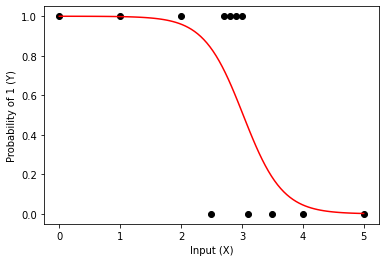

In [31]:
#Matplotlib으로 결과 시각화
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.scatter(x_train, y_train, c="black")

  x_tmp = torch.linspace(0, 5, 100).unsqueeze(1)
  y_tmp = torch.sigmoid(torch.mm(x_tmp, w) + b)

  plt.plot(x_tmp, y_tmp, "r")
  plt.ylabel("Probability of 1 (Y)")
  plt.xlabel("Input (X)")
  
  plt.show()


In [32]:
#sklearn에서 Logistic Regression 사용
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] #입력 방식이 pytorch와 다름, 1차원 배열

model = LogisticRegression(penalty='none')
#너무 큰 값과 너무 작은 값에 penalty를 주는 것 >> none regularization 안 함

model.fit(x_train, y_train) #학습 시킴

#w와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)

#새로운 x값이 주어질 때 y값 예측해보기
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]
